##Introduction

This will be an EDA with modeling designed to predict whether individuals with certain risk factors will experience heart disease or heart attacks. This can be utilized by medical professionals in efforts to intervene before individuals with high risk actually experience these cardiac events.  A proactive individual with reasonably low risk could use this model to minimize their risk of cardiac events.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Import Libraries
First, we will need to import the Python Libraries we will use in the data exploration and modeling.

In [ ]:
# import libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Load Data

Next, we will need to load the data. This dataset is large, so we will only be using a portion of the dataset in model development. This will be done after cleaning.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Raw Data/heart_disease_health_indicators_BRFSS2015.csv', nrows = 100000)
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  100000 non-null  float64
 1   HighBP                100000 non-null  float64
 2   HighChol              100000 non-null  float64
 3   CholCheck             100000 non-null  float64
 4   BMI                   100000 non-null  float64
 5   Smoker                100000 non-null  float64
 6   Stroke                100000 non-null  float64
 7   Diabetes              100000 non-null  float64
 8   PhysActivity          100000 non-null  float64
 9   Fruits                100000 non-null  float64
 10  Veggies               100000 non-null  float64
 11  HvyAlcoholConsump     100000 non-null  float64
 12  AnyHealthcare         100000 non-null  float64
 13  NoDocbcCost           100000 non-null  float64
 14  GenHlth               100000 non-null  float64
 15  M

In [ ]:
df.shape

(100000, 22)

##Data Cleaning
Now that the data is properly loaded, we will begin cleaning it of null values, duplicated rows, missing values, or other inconsistencies that will decrease the effectiveness of the model.

Each of these columns are valid contributors to the model, therefore we will not drop any columns.

In [ ]:
# check for null values
df.isna().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

There are no null values within the dataset.

In [ ]:
# check for duplicated rows
df.duplicated().any()

True

In [ ]:
df.duplicated().sum()

6067

There are 6067 duplicated rows within the dataset. These will need to be dealt with.

In [ ]:
# drop duplicated rows
df.drop_duplicates(keep = 'first', inplace = True)

The above code will drop the duplicated rows, while keeping 1 instance from each.

In [ ]:
# confirm duplicated rows dropped
df.duplicated().any()

False

In [ ]:
# check for outliers or other unexpected values
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000,93933.000000
mean,0.098996,0.451801,0.443848,0.961728,28.678303,0.461478,0.044042,0.316854,0.747086,0.622114,0.804350,0.060224,0.947260,0.087158,2.563817,3.359160,4.503380,0.177030,0.437461,8.128198,5.028723,5.998339
std,0.298658,0.497674,0.496840,0.191853,7.332759,0.498516,0.205190,0.716369,0.434685,0.484862,0.396702,0.237902,0.223515,0.282068,1.065413,7.525612,8.885449,0.381696,0.496076,3.070726,0.990042,2.074604
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


All values appear as expected.

##Data Visualizations
With the data now cleaned, we will create visuals to further explore the relationship between features.

In [ ]:
# check correlations to understand visuals
df.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.203610,0.172021,0.045129,0.040584,0.107594,0.203855,0.176227,-0.077917,-0.011104,-0.028543,-0.033117,0.024468,0.028500,0.247119,0.061932,0.174242,0.203848,0.087884,0.214370,-0.082058,-0.127552
HighBP,0.203610,1.000000,0.284316,0.109183,0.184063,0.082317,0.124780,0.264481,-0.111000,-0.025937,-0.053535,-0.014912,0.045290,0.005241,0.276339,0.041357,0.145975,0.212572,0.046166,0.333694,-0.113953,-0.141959
HighChol,0.172021,0.284316,1.000000,0.093664,0.083069,0.077414,0.088220,0.203747,-0.068642,-0.029219,-0.031056,-0.020072,0.051655,0.004574,0.190205,0.051228,0.112811,0.135080,0.025544,0.263029,-0.047690,-0.062722
CholCheck,0.045129,0.109183,0.093664,1.000000,0.041481,-0.006677,0.026051,0.071813,-0.001178,0.014935,-0.004107,-0.015510,0.115542,-0.059543,0.053694,-0.007416,0.036132,0.044984,-0.022744,0.094327,-0.002115,0.012840
BMI,0.040584,0.184063,0.083069,0.041481,1.000000,-0.008140,0.009105,0.194261,-0.130492,-0.072445,-0.050462,-0.054193,-0.012697,0.046874,0.202012,0.070455,0.099420,0.173053,0.029639,-0.057770,-0.079310,-0.073595
Smoker,0.107594,0.082317,0.077414,-0.006677,-0.008140,1.000000,0.057748,0.048234,-0.076280,-0.059873,-0.015286,0.094740,-0.016514,0.039966,0.140002,0.076476,0.104249,0.110167,0.092897,0.119297,-0.139647,-0.105099
Stroke,0.203855,0.124780,0.088220,0.026051,0.009105,0.057748,1.000000,0.102278,-0.063701,-0.011844,-0.040491,-0.021623,0.012345,0.036867,0.171782,0.071515,0.146975,0.170676,0.001069,0.125905,-0.067856,-0.124023
Diabetes,0.176227,0.264481,0.203747,0.071813,0.194261,0.048234,0.102278,1.000000,-0.109625,-0.027155,-0.048770,-0.064743,0.016535,0.030501,0.288083,0.064748,0.165356,0.214451,0.028605,0.177833,-0.113628,-0.150290
PhysActivity,-0.077917,-0.111000,-0.068642,-0.001178,-0.130492,-0.076280,-0.063701,-0.109625,1.000000,0.130753,0.140016,0.023651,0.026633,-0.051957,-0.247080,-0.117482,-0.209471,-0.247051,0.034399,-0.086572,0.179852,0.173698
Fruits,-0.011104,-0.025937,-0.029219,0.014935,-0.072445,-0.059873,-0.011844,-0.027155,0.130753,1.000000,0.249078,-0.027808,0.017972,-0.034503,-0.076556,-0.057521,-0.031037,-0.034579,-0.087897,0.073574,0.083533,0.050146


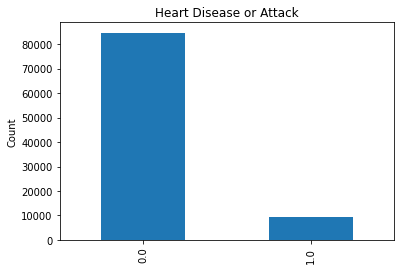

In [ ]:
# visual for HeartDiseaseorAttack
hda = df['HeartDiseaseorAttack'].value_counts()
hda.plot(kind = 'bar')
plt.title('Heart Disease or Attack')
plt.ylabel('Count');

HeartDiseaseorAttack will be our target vector for our models.  This visual shows the incredible unbalance of our dataset.  

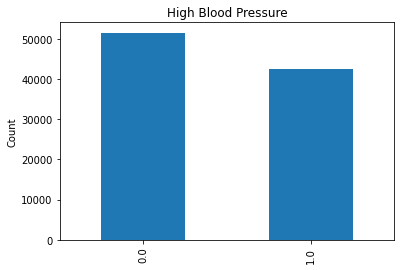

In [ ]:
# visual for HighBP
highbp = df['HighBP'].value_counts()
highbp.plot(kind= 'bar')
plt.title('High Blood Pressure')
plt.ylabel('Count');

This visual shows us that a much larger cohort of the dataset has been told they have high blood pressure at some point.  This is weakly correlated to our target vector.

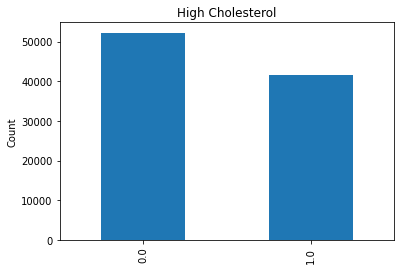

In [ ]:
# visual for HighChol
highchol = df['HighChol'].value_counts()
highchol.plot(kind = 'bar')
plt.title('High Cholesterol')
plt.ylabel('Count');

This visual shows that nearly half of our samples have been told they have high cholesterol at some point. HighChol is also weakly correlated to our target vector.

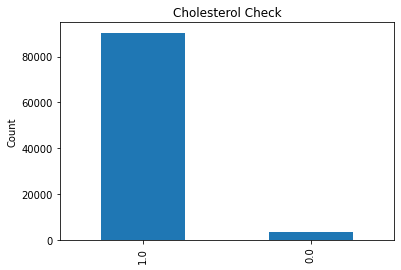

In [ ]:
# visual for CholCheck
cholcheck = df['CholCheck'].value_counts()
cholcheck.plot(kind = 'bar')
plt.title('Cholesterol Check')
plt.ylabel('Count');

This visual shows us that nearly all of our samples have had their cholesterol checked within the past 5 years. CholCheck is not correlated to our target vector.

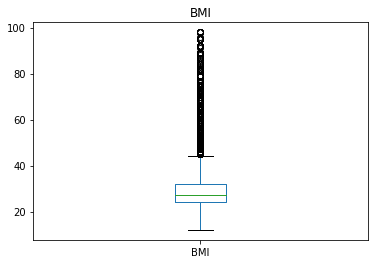

In [ ]:
# visual for BMI
df['BMI'].plot(kind = 'box')
plt.title('BMI');

This boxplot of the BMI column shows us that most of our BMI values fall between 20 and 40.  There are a large number of outliers above the statistical max. Individuals are considered Obese at a BMI of 30.  While clearly uncommon, the max BMI in our dataset of 98 is not impossible.  The average height for American Males is 69 inches. At that height, an individual must weigh 660 pounds for their BMI to be 98. We will keep these outliers due to the true possibility of their results.

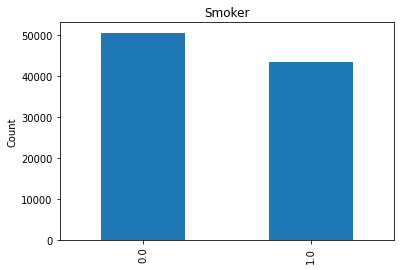

In [ ]:
# visual for Smoker
smoke = df['Smoker'].value_counts()
smoke.plot(kind = 'bar')
plt.title('Smoker')
plt.ylabel('Count');

This visual shows us that nearly half of our dataset have smoked at least 5 packs of cigarettes in their lifetime.  Smoker is very weakly correlated to our target vector.

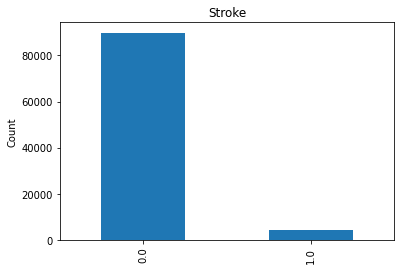

In [ ]:
# visual for stroke
stroke = df['Stroke'].value_counts()
stroke.plot(kind = 'bar')
plt.title('Stroke')
plt.ylabel('Count');

This visual shows us that very few of our samples have had a stroke.  This is moderately correlated to our target vector.

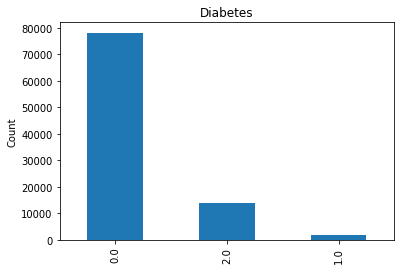

In [ ]:
# visual for diabetes
diabetes = df['Diabetes'].value_counts()
diabetes.plot(kind = 'bar')
plt.title('Diabetes')
plt.ylabel('Count');

This visual shows that the vast majority of our samples have no diabetes. Diabetes is weakly correlated to our target vector.

NOTE: 0 label is no diabetes, 1 label is Pre-diabetic, 2 label is Diabetic

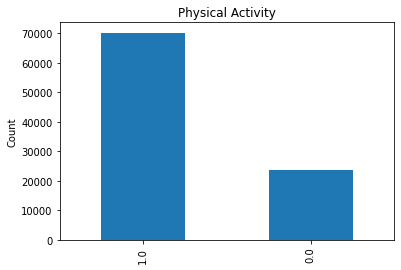

In [ ]:
# visual for physical activity
physed = df['PhysActivity'].value_counts()
physed.plot(kind = 'bar')
plt.title('Physical Activity')
plt.ylabel('Count');

This visual shows that most of our samples report some form of physical activity beyond normal daily activity in the last 30 days. Physical Activity is not correlated to our target vector.

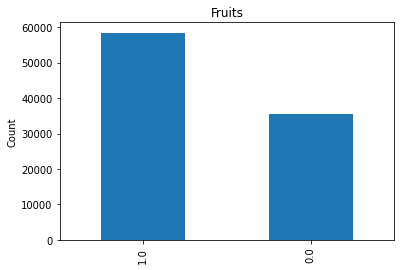

In [ ]:
# visual for fruit
fruit = df['Fruits'].value_counts()
fruit.plot(kind = 'bar')
plt.title('Fruits')
plt.ylabel('Count');

This visual shows that most of our samples consume fruit at least 1 time per day. Fruits column is not correlated to our target vector.

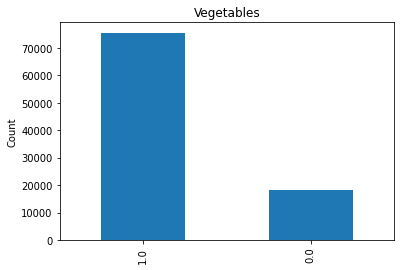

In [ ]:
# visual for veggies
veg = df['Veggies'].value_counts()
veg.plot(kind = 'bar')
plt.title('Vegetables')
plt.ylabel('Count');

This visual shows us that most of our samples report consuming vegetables at least once per day. Veggies column is not correlated to our target vector.

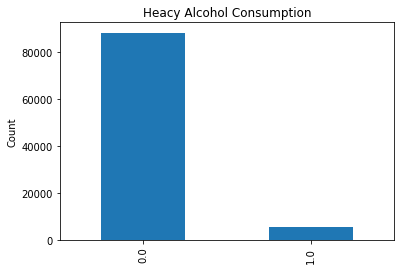

In [ ]:
# visual for heavy alcohol consumption
alcohol = df['HvyAlcoholConsump'].value_counts()
alcohol.plot(kind = 'bar')
plt.title('Heacy Alcohol Consumption')
plt.ylabel('Count');

This visual shows us that nearly all of our samples do not report heavy drinking. HvyAlcoholConsump is not correlated to our target vector.

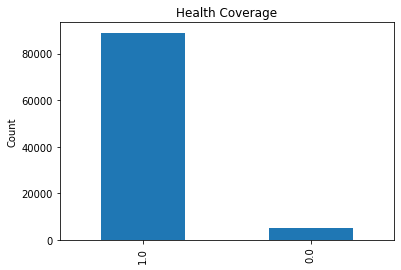

In [ ]:
# visual for health coverage
ins = df['AnyHealthcare'].value_counts()
ins.plot(kind = 'bar')
plt.title('Health Coverage')
plt.ylabel('Count');

This visual shows that nearly all of our samples report having some form of health coverage.  AnyHealthcare is not correlated to our target vector.

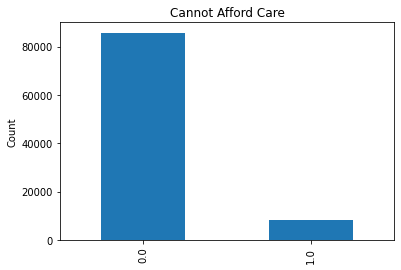

In [ ]:
# visual for NoDocbcCost
# this is essentially samples that needed medical attention, but avoided due to cost
cost = df['NoDocbcCost'].value_counts()
cost.plot(kind = 'bar')
plt.title('Cannot Afford Care')
plt.ylabel('Count');

This visual shows that very little of our sample report avoiding medical care due to cost.  NoDocbcCost is not correlated to our target vector.

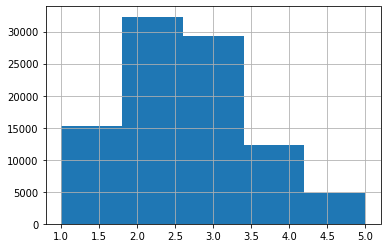

In [ ]:
# visual for General Health
df['GenHlth'].hist(bins = 5);

This visual shows us that most of our samples report their general health as either 2 or 3 on a scale of 5.  GenHlth is moderately correlated to our target vector.

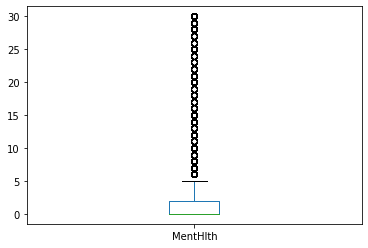

In [ ]:
# visual for MentHlth
df['MentHlth'].plot(kind = 'box');

This visual shows that the vast majority of our samples report fewer than 5 days out of the past 30 with poor mental health.  There are outliers above the statistical max.  This shows that few samples experienced mental health issues, but those that did experienced it in large amounts.  We will keep the outliers for this reason. MentHlth is not correlated to our target vector.

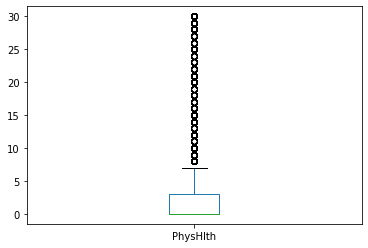

In [ ]:
# visual for PhysHlth
df['PhysHlth'].plot(kind = 'box');

Like MentHlth, this visual shows that most of our sample report fewer than 5 days with poor physical health.  There are also outliers above the statistical mean. This shows that a relatively small number of samples experienced issues with physical health, but those that did experienced them often.  We will keep the outliers for this reason. However, PhysHlth is weakly correlated to our target vector.

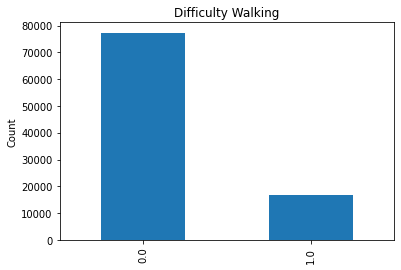

In [ ]:
# visual for diffwalk
walk = df['DiffWalk'].value_counts()
walk.plot(kind = 'bar')
plt.title('Difficulty Walking')
plt.ylabel('Count');

This visual shows that most of our samples do not report difficulty walking.  DiffWalk is moderately correlated to our target vector.

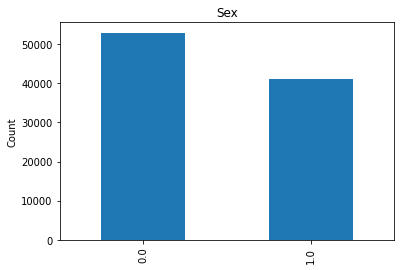

In [ ]:
# visual for sex
sex = df['Sex'].value_counts()
sex.plot(kind = 'bar')
plt.title('Sex')
plt.ylabel('Count');

This visual shows that we have slightly more males than females in our sample.  Sex is not correlated to our target vector.

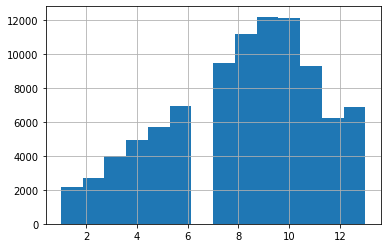

In [ ]:
# visual for age
df['Age'].hist(bins = 14);

Age is fairly normally distributed within our sample. Age is moderately correlated to our target vector.

NOTE: the values for age are grouped into 14 age categories.  We do not have the actual age values.

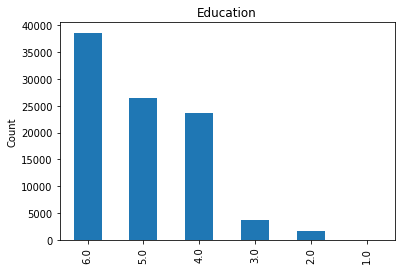

In [ ]:
# visual for education
ed = df['Education'].value_counts()
ed.plot(kind = 'bar')
plt.title('Education')
plt.ylabel('Count');

We do not have the category labels for Education.  Education is not correlated to our target vector.

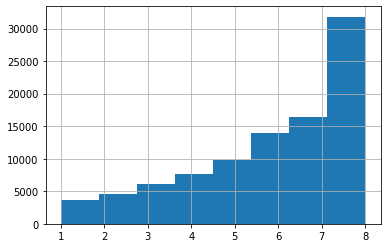

In [ ]:
# visual for income
df['Income'].hist(bins = 8);

We also do not have category labels for Income. However, Income is weakly correlated to our target vector.

##Heatmap
We will create a heatmap to visualize all correlations in one visual.

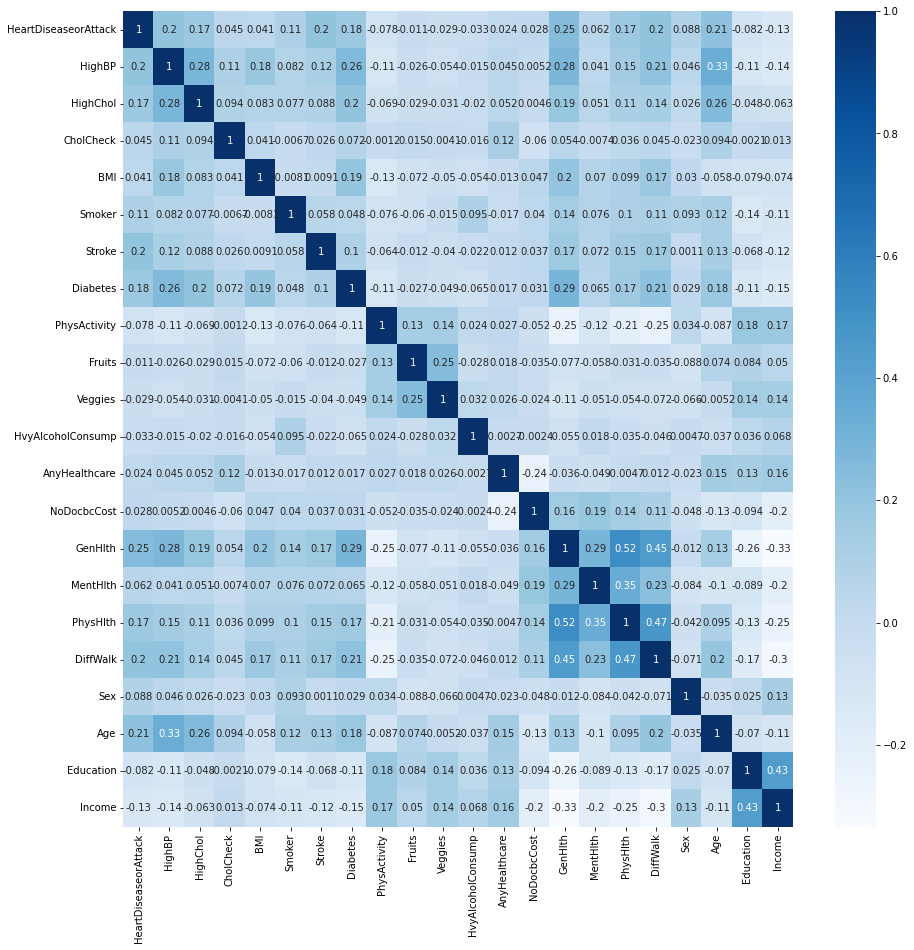

In [ ]:
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, cmap = 'Blues', annot = True);

##Strong/Moderate Correlations to Target Vector
The following columns show strong or moderate correlation to our Target of HeartDiseaseorAttack: HighBP, Stroke, GenHlth, and Age.

##Strong/Moderate Correlations Between Features
The following are strong/moderate correlations between features listed as (feature: features with correlation)

HighBP: HighChol, Diabetes, GenHlth, DiffWalk, Age

HighChol: HighBP, Diabetes, Age

CholCheck: None

BMI: GenHlth

Smoker: None

Stroke: None

Diabetes: HighBP, HighChol, GenHlth, DiffWalk

PhysActivity: GenHlth, PhysHlth, DiffWalk

Fruits: Veggies

Veggies: Fruits

HvyAlcholConsump: None

AnyHealthCare: NoDocbcCost, 

NoDocbcCost: AnyHealthCare, Income

GenHlth: HighBP, BMI, Diabetes, PhysActivity, MentHlth, DIffWalk, Education, Income

MentHlth: GenHlth, PhysHlth, DiffWalk, Income

PhysHlth: PhysActivity, GenHlth, MentHlth, DiffWalk, Income

DiffWalk: HighBP, Diabetes, PhysActivity, GenHlth, MentHlth, PhysHlth, Age, Income

Sex: None

Age: HighBP, HighChol, DIffWalk, 

Education: GenHlth, Income

Income: NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Education

##Multi-variate Data Visualizations

In [ ]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


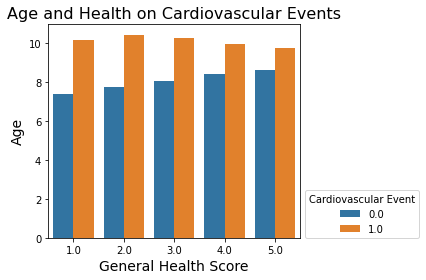

In [ ]:
sns.barplot(data = df, x = 'GenHlth', y = 'Age', hue = 'HeartDiseaseorAttack', ci = None)
plt.xlabel('General Health Score', fontsize = 14)
plt.ylabel('Age', fontsize = 14)
plt.title('Age and Health on Cardiovascular Events', fontsize = 16)
plt.legend(loc = (1.02, 0), title = 'Cardiovascular Event')
plt.tight_layout()
plt.savefig('age.png');

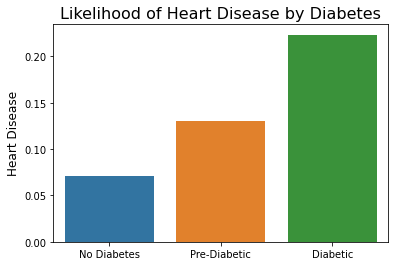

In [ ]:
sns.barplot(data = df, x = 'Diabetes', y = 'HeartDiseaseorAttack', ci = None)
plt.xlabel(None)
plt.ylabel('Heart Disease', fontsize = 12)
plt.xticks([0, 1, 2],['No Diabetes', 'Pre-Diabetic', 'Diabetic'], rotation = 0)
plt.title('Likelihood of Heart Disease by Diabetes', fontsize = 16)
plt.savefig('diabetic.png');

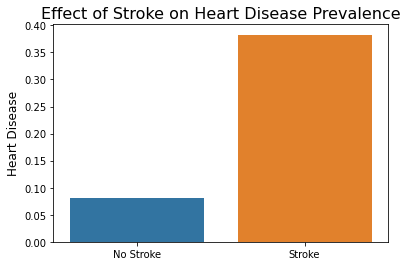

In [ ]:
sns.barplot(data = df, x = 'Stroke', y = 'HeartDiseaseorAttack', ci = None)
plt.xlabel(None)
plt.xticks([0,1], ['No Stroke', 'Stroke'])
plt.ylabel('Heart Disease', fontsize = 12)
plt.title('Effect of Stroke on Heart Disease Prevalence', fontsize = 16)
plt.savefig('stroke.png');